## Getting Started
Let's start a new session. **Replace client id and secret placeholders with actual values.**

In [1]:
%matplotlib inline

from gs_quant import *
import pprint as pp

# session = AppSession('CLIENT_ID', 'CLIENT_SECRET', Environment.PROD)
GsSession.use(Environment.QA)

Retrieve information about a dataset from the catalog.

In [2]:
from gs_quant.dataset import Dataset
dataset = Dataset('EDRVOL_PERCENT_SHORT')
catalog = dataset.catalog
fields = ['id', 'name', 'shortDescription', 'vendor', 'parameters']
catalog = {k: v for k, v in catalog.items() if k in fields}
pp.pprint(catalog)  # show selected metadata

{'id': 'EDRVOL_PERCENT_SHORT',
 'name': 'Equity Implied Volatility by Strike - EOD - Short Dated',
 'parameters': {'assetClass': 'Equity',
                'category': 'Market Data',
                'coverage': 'Coverage may change through time subject to '
                            'market dynamics, liquidity or other factors. The '
                            'following tenors are available in the short-dated '
                            'version of the dataset: 1m, 2m, 3m, 4m, 5m, 6m, '
                            '7m, 8m, 9m, 1y.',
                'frequency': 'Daily',
                'history': 'August 3, 2015 to present',
                'methodology': 'For a given equity asset, the dataset uses a '
                               'proprietary model to calibrate a surface of '
                               'implied volatilities. This surface represents '
                               'a 2 dimensional space across strikes (deltas) '
                               'and tenors wh

Find out what assets are included in the dataset.

In [3]:
coverage = dataset.get_coverage()
pp.pprint(coverage[:3])  # show the first 3 covered assets

[{'assetId': 'MA4CM8YSTE17SAD8',
  'bbid': 'TPXC30',
  'description': '',
  'name': 'TOPIX Core 30 Idx (TSE)'},
 {'assetId': 'MAYVTRHHE5A41HXM',
  'bbid': 'SXAE',
  'description': '',
  'name': 'ESTX AUTO&PARTS EUR PR'},
 {'assetId': 'MA4B66MW5E27U8P32VS',
  'bbid': 'TAMSCI',
  'description': '',
  'name': 'MSCI Taiwan (simex Derivatives) TWD'}]


## Retrieving a Data Table
Get data as a Pandas DataFrame. Note: this example will not work if you do not have access to EDRVOL_PERCENT_SHORT.

In [3]:
from datetime import date
df = dataset.get_data(date(2018, 1, 2), date(2018, 1, 9), ric='.SPX', relativeStrike=1)
df.head()

,absoluteStrike,assetId,date,impliedVolatility,relativeStrike,ric,strikeReference,tenor,updateTime
0,2697.783746,MA4B66MW5E27U8P32SB,2018-01-02,0.070022,1.0,.SPX,forward,1m,2018-01-03T02:04:53Z
1,2696.135644,MA4B66MW5E27U8P32SB,2018-01-02,0.080888,1.0,.SPX,forward,2m,2018-01-03T02:04:53Z
2,2697.130446,MA4B66MW5E27U8P32SB,2018-01-02,0.091925,1.0,.SPX,forward,3m,2018-01-03T02:04:53Z
3,2699.050048,MA4B66MW5E27U8P32SB,2018-01-02,0.099709,1.0,.SPX,forward,4m,2018-01-03T02:04:53Z
4,2698.260491,MA4B66MW5E27U8P32SB,2018-01-02,0.106814,1.0,.SPX,forward,5m,2018-01-03T02:04:53Z


## Retrieving a Data Series
Get S&P 500 prices as a Pandas Series. Note: this example will not work if you do not have access to TREOD.

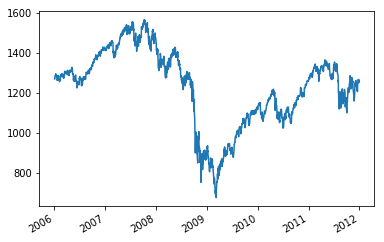

In [4]:
import matplotlib.pyplot as plt
from datetime import date
dataset = Dataset('TREOD')
series = dataset.get_data_series('tradePrice', date(2006, 1, 1), date(2012, 1, 1), assetId='MA4B66MW5E27U8P32SB')
plt.clf()
series.plot()
plt.show()


Calculate max drawdown and plot it.

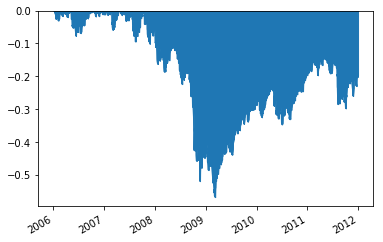

In [5]:
import gs_quant.timeseries as ts  # timeseries functions do not require an open session
mdd = ts.max_drawdown(series)
plt.clf()
mdd.plot('area')
plt.show()

## Identifier Mapping
Map identifiers from one type to another e.g. Marquee asset ID to BBID.

In [7]:
from gs_quant.asset import Asset
ids = Asset.map_identifiers('id', 'bbid', ['MA4B66MW5E27U8P32SB', 'MA4B66MW5E27U8NN95P', 'MA4B66MW5E27UAHKG34'])
pp.pprint(ids)

{'MA4B66MW5E27U8NN95P': 'UKX',
 'MA4B66MW5E27U8P32SB': 'SPX',
 'MA4B66MW5E27UAHKG34': 'GS UN'}


## Cleaning Up

When finished, call session.finish() to free up resources. Alternatively, use 'with' syntax to take care of this automatically.

In [6]:
dataset = Dataset('TREOD')

with GsSession.get(Environment.PROD):
    # session is open in this block
    series = dataset.get_data_series('tradePrice', date(2006, 1, 1), date(2012, 1, 1), assetId='MA4B66MW5E27U8P32SB')

# session is closed out here
mdd = ts.max_drawdown(series)